Скорость жидкости $w_{0} = 1.5$ м/c, $x_{0} = 0.5$
$$$$
Коэффициент теплопроводности $\lambda = 0.0251$
$$$$
Длина пластины $L = 0.8$
$$$$
Коэффициент кинематической вязкости $\nu = 14.6\cdot10^{-6}$

In [1]:
import numpy
from numpy import arange
import math as mth

w0 = 1.5 #Скорость жидкости в м/с
x0 = 0.5
lmbd = 0.0251 #Коэффициент теплопроводности
L = 0.8 #Длина пластины
v = 14.6 * 10 ** (-6) #Коэффициент вязкости жидкости
n = 100 #Количество узлов для интерполяции
zero = 0.0001

Re = lambda x: (w0 * x) / v
alpha = lambda x: (0.0255 * lmbd * Re(x) ** 0.8) / x   
delta = lambda x: (4.64 * x) / mth.sqrt(Re(x))
W = lambda y, x = x0: (3 * w0 * y) / (2 * delta(x)) - (w0 * y ** 3) / (2 * delta(x) ** 3) 

def trapezoidal_rule(function, a, b):
    result = 0.0
    h = (b - a) / n
    for x in arange(a + h, b - h, h):
        result += function(x)
    result = ((function(a) + function(b)) / 2 + result) * h
    return round(result, 3)

def simpsons_rule(function, a, b):
    result = 0.0
    h = (b - a) / n
    for x in range(1, n - 1):
        if x % 2 == 0:
            result += 2*function(a + x*h)
        else:
            result += 4*function(a + x*h)
    result = h*(result + function(a) + function(b))/3
    return round(result, 3)

def gauss_rule(function, a, b):
    a_list = [0.3478548, 0.6521452, 0.6521452, 0.3478548]
    t_list = [0.8611363, 0.3399810, -0.3399810, -0.8611363]
    result = 0.0
    for i in range(4): #because 4 elems in lists above
        result += a_list[i]*function((b + a)/2 + t_list[i]*(b - a)/2)
    result *= (b - a)/2
    return round(result, 3)

print('Проверка ламинарности потока Re(L) = ', round(Re(L)))

Проверка ламинарности потока Re(L) =  82192


$$W_{sr} = \int_{0}^{\delta(x_{0})} w(x_{0}, y) dy$$
$$W_{sr} = \frac{W_{sr}}{\delta(x_{0})}$$
Истинное значение: $W_{sr} = 0.937$

In [2]:
print('Результат метода трапеций:', 
      trapezoidal_rule(W, zero, delta(x0) + zero)/delta(x0))
print('Результат метода Симпсона:', 
      simpsons_rule(W, zero, delta(x0) + zero)/delta(x0))
print('Результат метода Гаусса:', 
      gauss_rule(W, zero, delta(x0) + zero)/delta(x0))

Результат метода трапеций: 0.976936236879
Результат метода Симпсона: 0.9769362368785014
Результат метода Гаусса: 0.9769362368785014


$$\alpha_{1} = \int_{0}^{L} \alpha(x) dx$$
$$\alpha_{1} = \frac{\alpha_{1}}{L}$$
Истинное значение: $\alpha_{1} = 8.549$

In [3]:
print('Результат метода трапеций:', 
      trapezoidal_rule(alpha, zero, L + zero)/L)
print('Результат метода Симпсона:', 
      simpsons_rule(alpha, zero, L + zero)/L)
print('Результат метода Гаусса:', 
      gauss_rule(alpha, zero, L + zero)/L)

Результат метода трапеций: 8.55875
Результат метода Симпсона: 8.49875
Результат метода Гаусса: 8.4325


In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy 

Зависимость скорости жидкости от расстояния до поверхности пластины

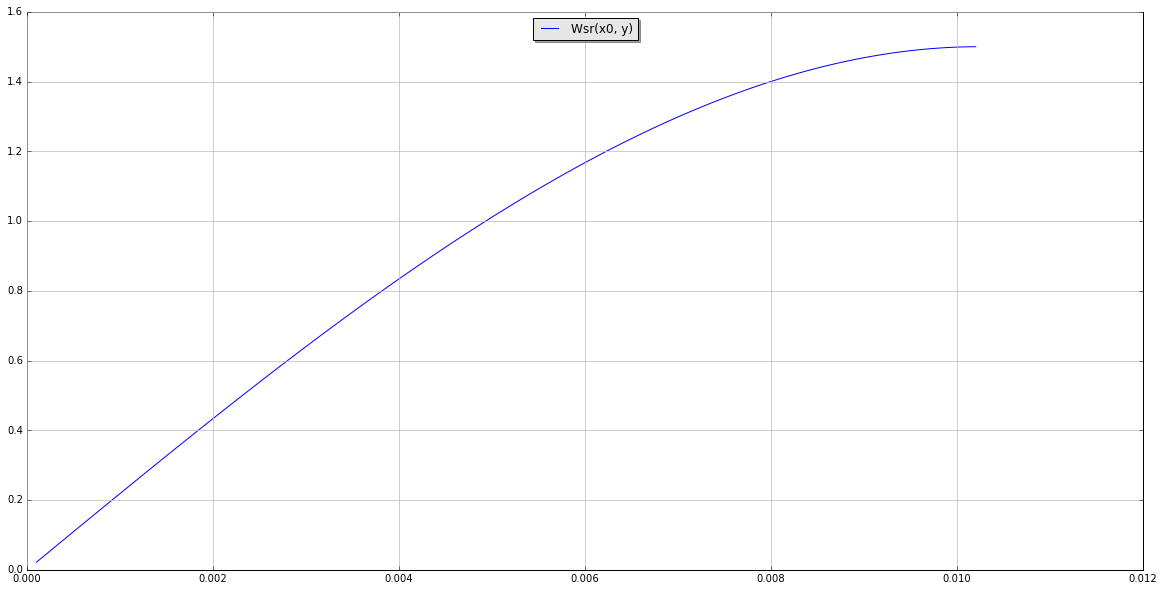

In [5]:
xs = arange(zero , delta(x0), 0.0001)
ys = [W(x) for x in xs]
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(xs, ys, '-b',label = 'Wsr(x0, y)')
ax.xaxis.set_minor_locator(plt.MultipleLocator(50))
ax.yaxis.set_minor_locator(plt.MultipleLocator(50))
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
legend = ax.legend(loc = 'upper center', shadow = True)

frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()

Зависимость коэффициента теплоотдачи по длине пластины

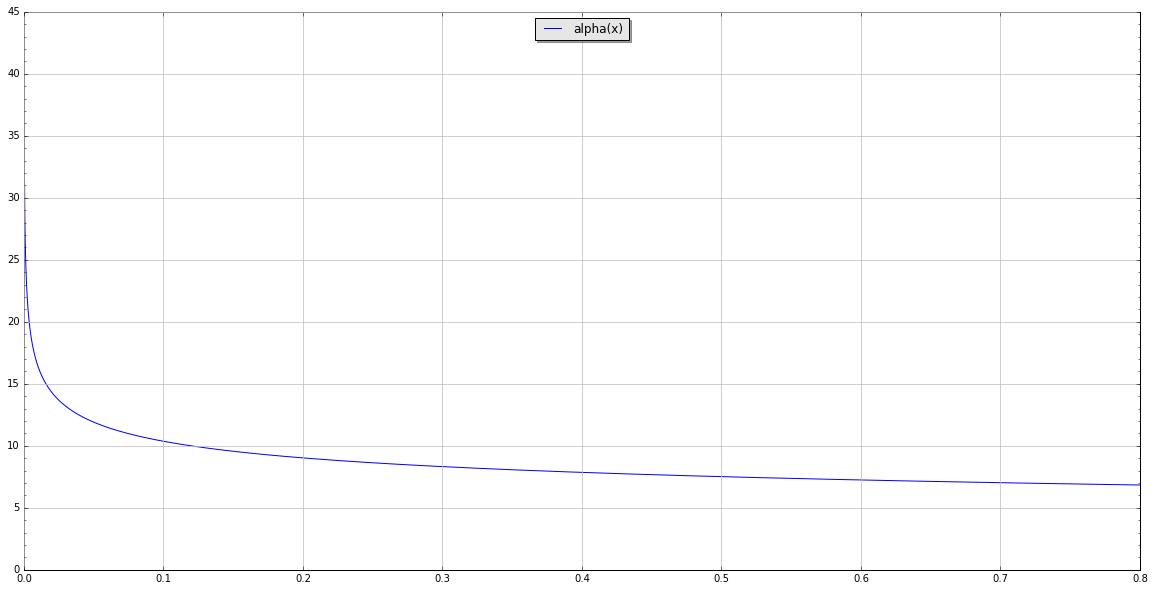

In [6]:
xs = arange(zero , L, 0.0001)
ys = [alpha(x) for x in xs]
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(xs, ys, '-b',label = 'alpha(x)')
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
legend = ax.legend(loc = 'upper center', shadow = True)

frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()